# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:
# ... ENTER YOUR CODE HERE
import numpy as np
from matplotlib import pyplot as plt 

def construct_design_matrix(x,y,m):
    n=len(x)
    #print(n)
    A=np.ones((n,m))
    for i in range(m-1):
        A[:,i+1]=np.multiply(A[:,i],x)
    return A

def solve_normal_equation(x,y,m):
    A=construct_design_matrix(x,y,m)
    AT=np.transpose(A)
    ATA=AT@A
    b=AT@y
    beta=np.linalg.solve(ATA,b)
    return beta

def eval_beta(xval,beta):
    m=len(beta)
    term=0.0
    for j in range(m):
        term+=beta[j]*xval**j
    return term

plt.scatter(x,y)
for m in range(3,15,1):
    beta3=solve_normal_equation(x,y,m)
    y3=[eval_beta(_,beta3) for _ in x]
    plt.plot(x,y3)
plt.show()





<Figure size 640x480 with 1 Axes>

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

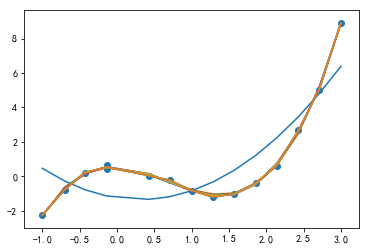

In [3]:
# ... ENTER YOUR CODE HERE ...
def delta2(x,y,m):
    beta3=solve_normal_equation(x,y,m)
    #print(beta3)
    
    y3=[eval_beta(_,beta3) for _ in x]
    term=0.0
    n=len(x)
    for k in range(n):
        #print(k)
        #print(y3[k])
        term+=(y3[k]-y[k])**2
    return 1/(n-m)*term,beta3


d2=[]
b3=[]
mr=range(3,15,1)

for m in mr:
    delta,beta3=delta2(x,y,m)
    d2.append(delta)
    b3.append(beta3)
    y3=[eval_beta(_,beta3) for _ in x]
    plt.plot(x,y3)

plt.scatter(x,y)
plt.show()




Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

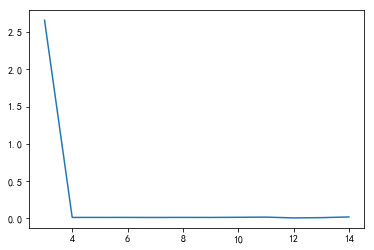

In [4]:
# ... ENTER YOUR CODE HERE
plt.plot(mr,d2)


### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

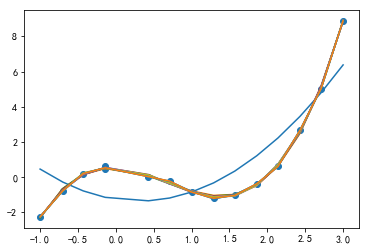

In [5]:
# ... ENTER YOUR CODE HERE ...
import numpy as np
from matplotlib import pyplot as plt 

def construct_design_matrix(x,y,m):
    n=len(x)
    #print(n)
    A=np.ones((n,m))
    for i in range(m-1):
        A[:,i+1]=np.multiply(A[:,i],x)
    return A

def solve_normal_equation_qr(x,y,m):
    A=construct_design_matrix(x,y,m)
    Q,R=np.linalg.qr(A)
    QT=np.transpose(Q)
    fr=QT@y
    f=fr[0:m]
    R1=R[0:m,:]
    beta=np.linalg.solve(R1,f)
    return beta

def eval_beta(xval,beta):
    m=len(beta)
    term=0.0
    for j in range(m):
        term+=beta[j]*xval**j
    return term

plt.scatter(x,y)
for m in range(3,15,1):
    beta3=solve_normal_equation_qr(x,y,m)
    y3=[eval_beta(_,beta3) for _ in x]
    plt.plot(x,y3)
plt.show()

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

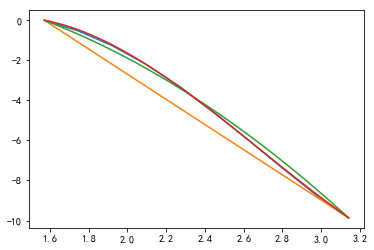

In [6]:
# ... ENTER YOUR CODE HERE ...
def lang_k(xval,xk,k):
    n=len(xk)
    term=1.0
    for j in range(n):
        if j==k: 
            continue
        num=xval-xk[j]
        den=xk[k]-xk[j]
        term*=num/den
    return term

def lang(xval,xk,yk):
    return sum(yk[j]*lang_k(xval,xk,j) for j in range(len(xk)))

def f(x):
    return (x**2)*np.cos(x)

xv=np.linspace(np.pi/2,np.pi,10)
fv=[f(x) for x in xv]
plt.plot(xv,fv)

for m in range(2,5,1):
    xv=np.linspace(np.pi/2,np.pi,m)
    yv=[f(x) for x in xv]
    xv100=np.linspace(np.pi/2,np.pi,100)
    langv=[lang(_,xv,yv) for _ in xv100]
    plt.plot(xv100,langv)
plt.show()




### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

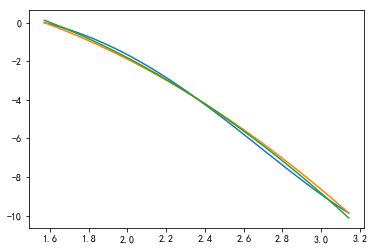

In [7]:
# ... ENTER YOUR CODE HERE ...
leftrange=np.pi/2
rightrange=np.pi
# old func
xv100=np.linspace(leftrange,rightrange,100)
fv100=[f(x) for x in xv100]
plt.plot(xv100,fv100)

# lang result
m=3
xv=np.linspace(np.pi/2,np.pi,m)
yv=[f(x) for x in xv]
langv100=[lang(_,xv,yv) for _ in xv100]
plt.plot(xv100,langv100)

# chebyshev result
iv=range(m)
xv1=[np.cos((2*k+1)*np.pi/(2*m)) for k in iv]
xv=[(rightrange-leftrange)/(1-(-1))*(x-(-1))+leftrange for x in xv1]
yv=[f(x) for x in xv]
langv=[lang(_,xv,yv) for _ in xv100]
plt.plot(xv100,langv)

plt.show()


